In [42]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

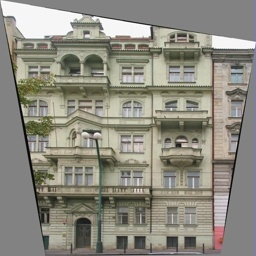

In [22]:
im = Image.open('datasets/facades/train/A/100_A.jpg')
im

In [23]:
x = np.array(im)/256.0
x.shape

(256, 256, 3)

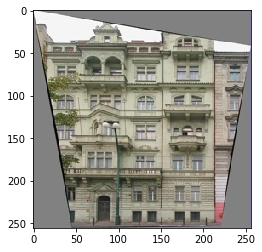

In [35]:
plt.imshow(x)
plt.show()

In [29]:
import torch

In [33]:
y = torch.tensor(x).permute(2,0,1).unsqueeze(0)
y.shape

torch.Size([1, 3, 256, 256])

In [34]:
0.9999999+0.000000001

0.999999901

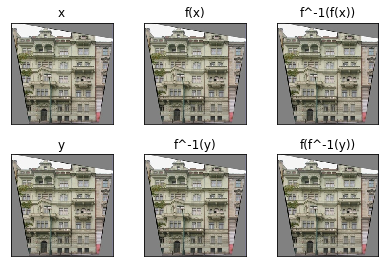

In [41]:
    import matplotlib.pyplot as plt
    fig,((ax11,ax12,ax13),(ax21,ax22,ax23)) = plt.subplots(2,3,sharex=True,sharey=True)
    
    ax11.imshow(   x)
    ax12.imshow(   x)
    ax13.imshow(x)
    ax11.set_title('x')
    ax12.set_title('f(x)')
    ax13.set_title('f^-1(f(x))')
    
    ax21.imshow(x)
    ax22.imshow(x)
    ax23.imshow(x)
    ax21.set_title('y')
    ax22.set_title('f^-1(y)')
    ax23.set_title('f(f^-1(y))')
    
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [52]:
im_tensor = transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))(transforms.ToTensor()(im))
print(im_tensor.max())
print(im_tensor.min())

tensor(1.)
tensor(-1.)
